# 1. Predictive Analytics for  Waterpoint Operational Status in Tanzania

# 2. Business Understanding
### 2.0.1 Objectives
The primary goal of this project is to predict the operational status of waterpoint in Tanzania. By accurately predicting whether it is fuctional, needs repair or is non-fuctional, it can help the Tanzania Ministry of water and other stakeholders in optimizing operations ansd ensure a reliable supply of clean water to communities.

### 2.0.2 Stakeholders
- **Tanzania Ministry of Water:** Responsible for the maintaince and management of waterpoints
- **Local Communities:** Depend on this waterpoints for their daily water needs
- **Maintainance Team:** Tasked with repairing and maintaining the waterpoints

### 2.0.3 Success Creteria
- **Accuracy:** The model should have a high accuracy in predicting the status of waterpoints.
- **Actionable Insight:** The predictions should lead to actionable insight that can improve maintainance schedules and resouce allocation
- **Scalability:** The solution should be scalable to handle data from other regions or countries

### 2.0.4 Key Questions
- Which factors most influence the operational status of waterpoints?
- How can we prioritize waterpoints for maintenance based on the model’s predictions?
- What patterns or trends can be identified from the data that could inform future
waterpoint installations?


### 2.0.5 Constraints
- **Data Quality**: The accuracy of the model depends on the quality and completeness of the
data.
- **Resource Limitations:** Limited resources for maintenance and repairs may affect the implementation of the model’s recommendations.
- **Geographical Challenges:** Remote or hard-to-reach areas may pose challenges for data
collection and maintenance.


### 2.0.6 Potential Impact
- **Improved Water Access:** Ensuring that more waterpoints are functional can significantly
improve access to clean water for communities.
- **Cost Savings:** Predictive maintenance can reduce costs by preventing major breakdowns
and optimizing resource allocation.
- **Enhanced Decision-Making:** Data-driven insights can help policymakers and stakeholders
make informed decisions about water infrastructure investments.

# 2.  Data Understanding


In [1]:
  # Import necessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import libraries for preprocessing and model building
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler,LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay,roc_auc_score, roc_curve, auc
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

### 3.1) Load the Data

In [2]:
# Independent variables (features)
train_values= pd.set_option('display.max_columns', None)
train_values = pd.read_csv('Data/training_set_values.csv', index_col='id')
# Dependent variable
train_labels = pd.read_csv('Data/training_set_labels.csv', index_col='id')
# Test Data
test_data = pd.read_csv('Data/test_set_values.csv', index_col='id')

The code reads three CSV files into separate DataFrames: train_values for the training features,
train_labels for the training labels, and test_data for the test features. Each DataFrame uses
the ‘id’ column as its index, preparing the data for further analysis or model training.

### 2.2). Basic Data Inspection
Check the first few rows to get a general idea of the data



In [3]:
# Display the first few rows of the dataset
train_values.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
train_labels.head()


,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional


In [5]:
test_data.head()



,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [6]:
# Merge the independent and dependent variables
train_data = pd.merge(train_labels, train_values, how='inner', left_index=True,right_index=True)
# setting a new index
train_data = train_data.reset_index()
#train_data = train_data.reset_index(drop=True)

- Get the shape of the dataset to know the number of rows and columns

In [7]:
# Check the shape of the dataset
train_data.shape


(59400, 41)

- View the column names to understand the features available.

In [8]:
# View the columns
train_data.columns


Index(['id', 'status_group', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

- Check for any missing values in the dataset.

In [9]:
# Check for missing values
missing_values = train_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)


funder                3635
installer             3655
subvillage             371
public_meeting        3334
scheme_management     3877
scheme_name          28166
permit                3056
dtype: int64


The columns with missing data, such as `funder`, `installer`, `public_meeting`, and `scheme_name`,are crucial to ensure the quality and completeness of the
dataset before analysis or model training.


- Examine the unique values in columns to understand the diversity of the data.

In [10]:
# Get categorical columns
columns_list = train_data.select_dtypes(include=['object', 'int','float']).columns
# Create dictionary with column names and unique values
unique_values_dict = {col: train_data[col].nunique() for col in columns_list}
# Convert dictionary to DataFrame
unique_values_df = pd.DataFrame(list(unique_values_dict.items()),columns=['Column', 'Unique Values'])
# Limit to 5 rows
unique_values_df = unique_values_df
print(unique_values_df)


                   Column  Unique Values
0                      id          59400
1            status_group              3
2              amount_tsh             98
3           date_recorded            356
4                  funder           1897
5              gps_height           2428
6               installer           2145
7               longitude          57516
8                latitude          57517
9                wpt_name          37400
10            num_private             65
11                  basin              9
12             subvillage          19287
13                 region             21
14            region_code             27
15          district_code             20
16                    lga            125
17                   ward           2092
18             population           1049
19         public_meeting              2
20            recorded_by              1
21      scheme_management             12
22            scheme_name           2696
23              

Insights:
1. High Cardinality Columns:
- `id`: 59,400 unique values. This is likely a unique identifier for each record.
- `longitude and latitude`: Both have over 57,000 unique values, indicating a wide geographical spread of data points.
- `wpt_name`: 37,399 unique values, suggesting a large number of unique water point
names.
- `subvillage`: 19,287 unique values, indicating a high number of unique sub-villages.
2. Moderate Cardinality Columns:
- `funder`: 1,896 unique values. This shows a diverse range of funding sources.
- `installer`: 2,145 unique values, indicating many different installers.
- `gps_height`: 2,428 unique values, suggesting varied elevation data.
- `ward`: 2,092 unique values, reflecting a large number of administrative wards.
- `scheme_name`: 2,695 unique values, indicating many different water schemes.
3. Low Cardinality Columns:
- `status_group`: 3 unique values, likely representing different statuses (e.g., functional,
non-functional).
- `public_meeting and permit`: Both have 2 unique values, indicating binary data (e.g.,
Yes/No).
- `recorded_by`: Only 1 unique value, suggesting all data was recorded by the same
entity.
- `management_group`: 5 unique values, indicating a few management categories.




### 3.3 Data Types and Summary Statistics
• Get the data types of each column.

In [11]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

It contains 59,400 entries and 41 columns.


- Generate summary statistics for numerical columns.


In [12]:
# Summary statistics for numerical features
train_data.describe()


,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


The dataset analysis reveals the following key points:

1. **Amount of Tanzanian Shilling (amount_tsh)**: The average budget is around TSH 318, but the large standard deviation (2997.57) and the maximum value of TSH 350,000 highlight significant variation, with some water points having exceptionally high budgets.

2. **GPS Height**: The average GPS height is approximately 668 meters, though the large standard deviation (693 meters) and a minimum value of -90 meters suggest potential errors or data points below sea level.

3. **Longitude and Latitude**: The average coordinates (longitude: 34.08, latitude: -5.71) align with Tanzania’s location, but the broad spread of data points shows that the water points are geographically distributed across a wide area.

4. **Population**: The average population served by each water point is about 180 people, but the high standard deviation (471.48) and the maximum of 30,500 indicate that some water points serve much larger populations.

5. **Construction Year**: The mean construction year is influenced by numerous missing (zero) values, but the median year is 1986, with most water points built between 2004 and 2013.

In [13]:
# Summary statistics for categorical features
train_data.describe(include=['object'])


,status_group,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59400,59400,55765,55745,59400,59400,59029,59400,59400,59400,56066,59400,55523,31234,56344,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,3,356,1897,2145,37400,9,19287,21,125,2092,2,1,12,2696,2,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6
top,functional,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,K,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,32259,572,9084,17402,3563,10248,508,5294,2503,307,51011,59400,36793,682,38852,26780,26780,26780,40507,52490,25348,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625


The dataset summary highlights several important findings:

1. **Status Group**: The majority of water points are operational, with 32,259 entries categorized as "functional."
   
2. **Date Recorded**: The dataset spans 356 unique recording dates, with March 15, 2011, being the most frequently recorded date.

3. **Funder and Installer**: The Government of Tanzania and DWE are the most common funders and installers, indicating their central role in water point projects.

4. **Geographical Distribution**: The dataset represents various regions, with Iringa having the highest number of entries. Lake Victoria is the most common basin.

5. **Water Quality and Source**: Most water points have "soft" water quality and are sourced from springs, showing a dominance of groundwater sources.

6. **Waterpoint Type**: "Communal standpipe" is the most common water point type, suggesting a focus on shared access to water.

- Analyse the target column status_group

In [14]:
train_data['status_group'].value_counts()


functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

The dataset has highly imbalanced target values, along with null values and some columns that contain redundant or duplicate information. To improve model performance and simplify the data, we will remove these columns. By doing so, we eliminate irrelevant or repetitive data that does not impact the target variable, making the dataset cleaner and easier to work with for modeling. This process will help streamline the analysis and improve the efficiency of model training.

- checking for duplicates

In [15]:
train_data.duplicated().sum()

0

There is no missing values in our dataset

- Fuction to remove outliers in a dataset

In [16]:
def remove_outlier(df, columns):
    for col in columns:
        if col in df.columns:  # Ensure the column exists in the DataFrame
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)  
            iqr = q3 - q1  
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr

            # Filter the DataFrame for values within the bounds
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

- removing Outliers 

In [17]:
columns_to_remove_outliers = ['longitude', 'latitude']
train_data = remove_outlier(train_data, columns_to_remove_outliers)

# 4 Data Exploration


### 4.1 Univariate Analysis

- Analyze the distribution of numerical features.

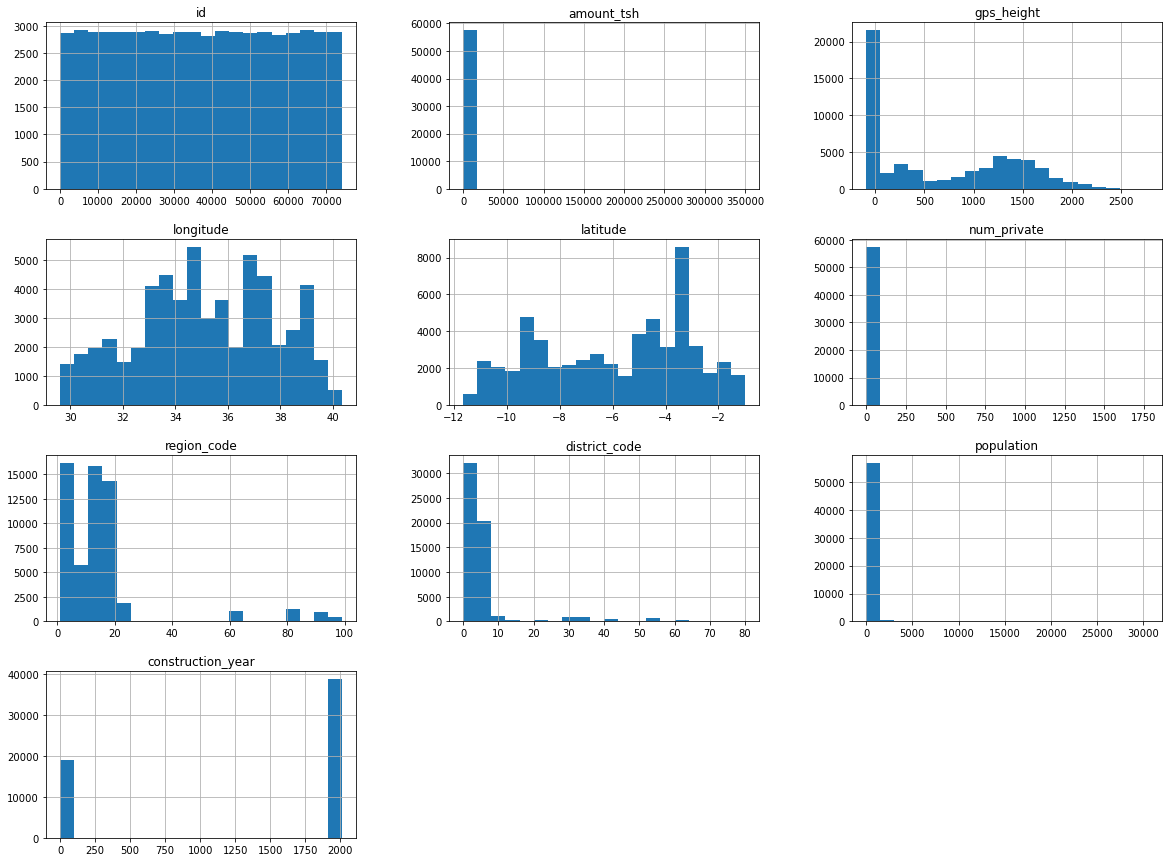

In [18]:
# Distribution of numerical features
train_data.hist(bins=20, figsize=(20, 15))
plt.show()


The analysis of the univariate numerical columns provides the following insights:

1. **ID**: Most ID values are concentrated at the higher end, indicating that a significant portion of entries have high ID numbers.

2. **Amount TSH**: The majority of values are close to zero, suggesting that most entries have low or no recorded values for this variable.

3. **GPS Height**: The distribution of GPS heights appears normal, centered around zero, indicating that most data points are close to sea level.

4. **Longitude**: The data points are widely spread, with noticeable gaps in certain longitude ranges, meaning some longitude intervals have no data.

5. **Latitude**: The distribution shows two distinct peaks, indicating that most data points are concentrated in two specific latitude ranges.

6. **Num Private**: Nearly all values are zero or very close to zero, indicating that this variable is predominantly low or absent for most entries.

7. **Region Code**: The data is concentrated in lower region code values, with a sharp decline as the region code increases, suggesting that most entries are from a few specific regions.

8. **District Code**: Similar to the region code, the data is concentrated in lower district code values, with fewer entries as the district code increases, indicating dominance by a few districts.

9. **Population**: Most data points are clustered around zero, with few entries reflecting higher population numbers. This suggests that many areas have small populations, while only a few have large populations.

10. **Construction Year**: A large peak at zero indicates many entries with missing construction year data. After that, there’s a gap, and then a steady amount of data starts appearing around 1960, with more consistent data recorded until around 2000.

- Analyze the distribution of categorical features.


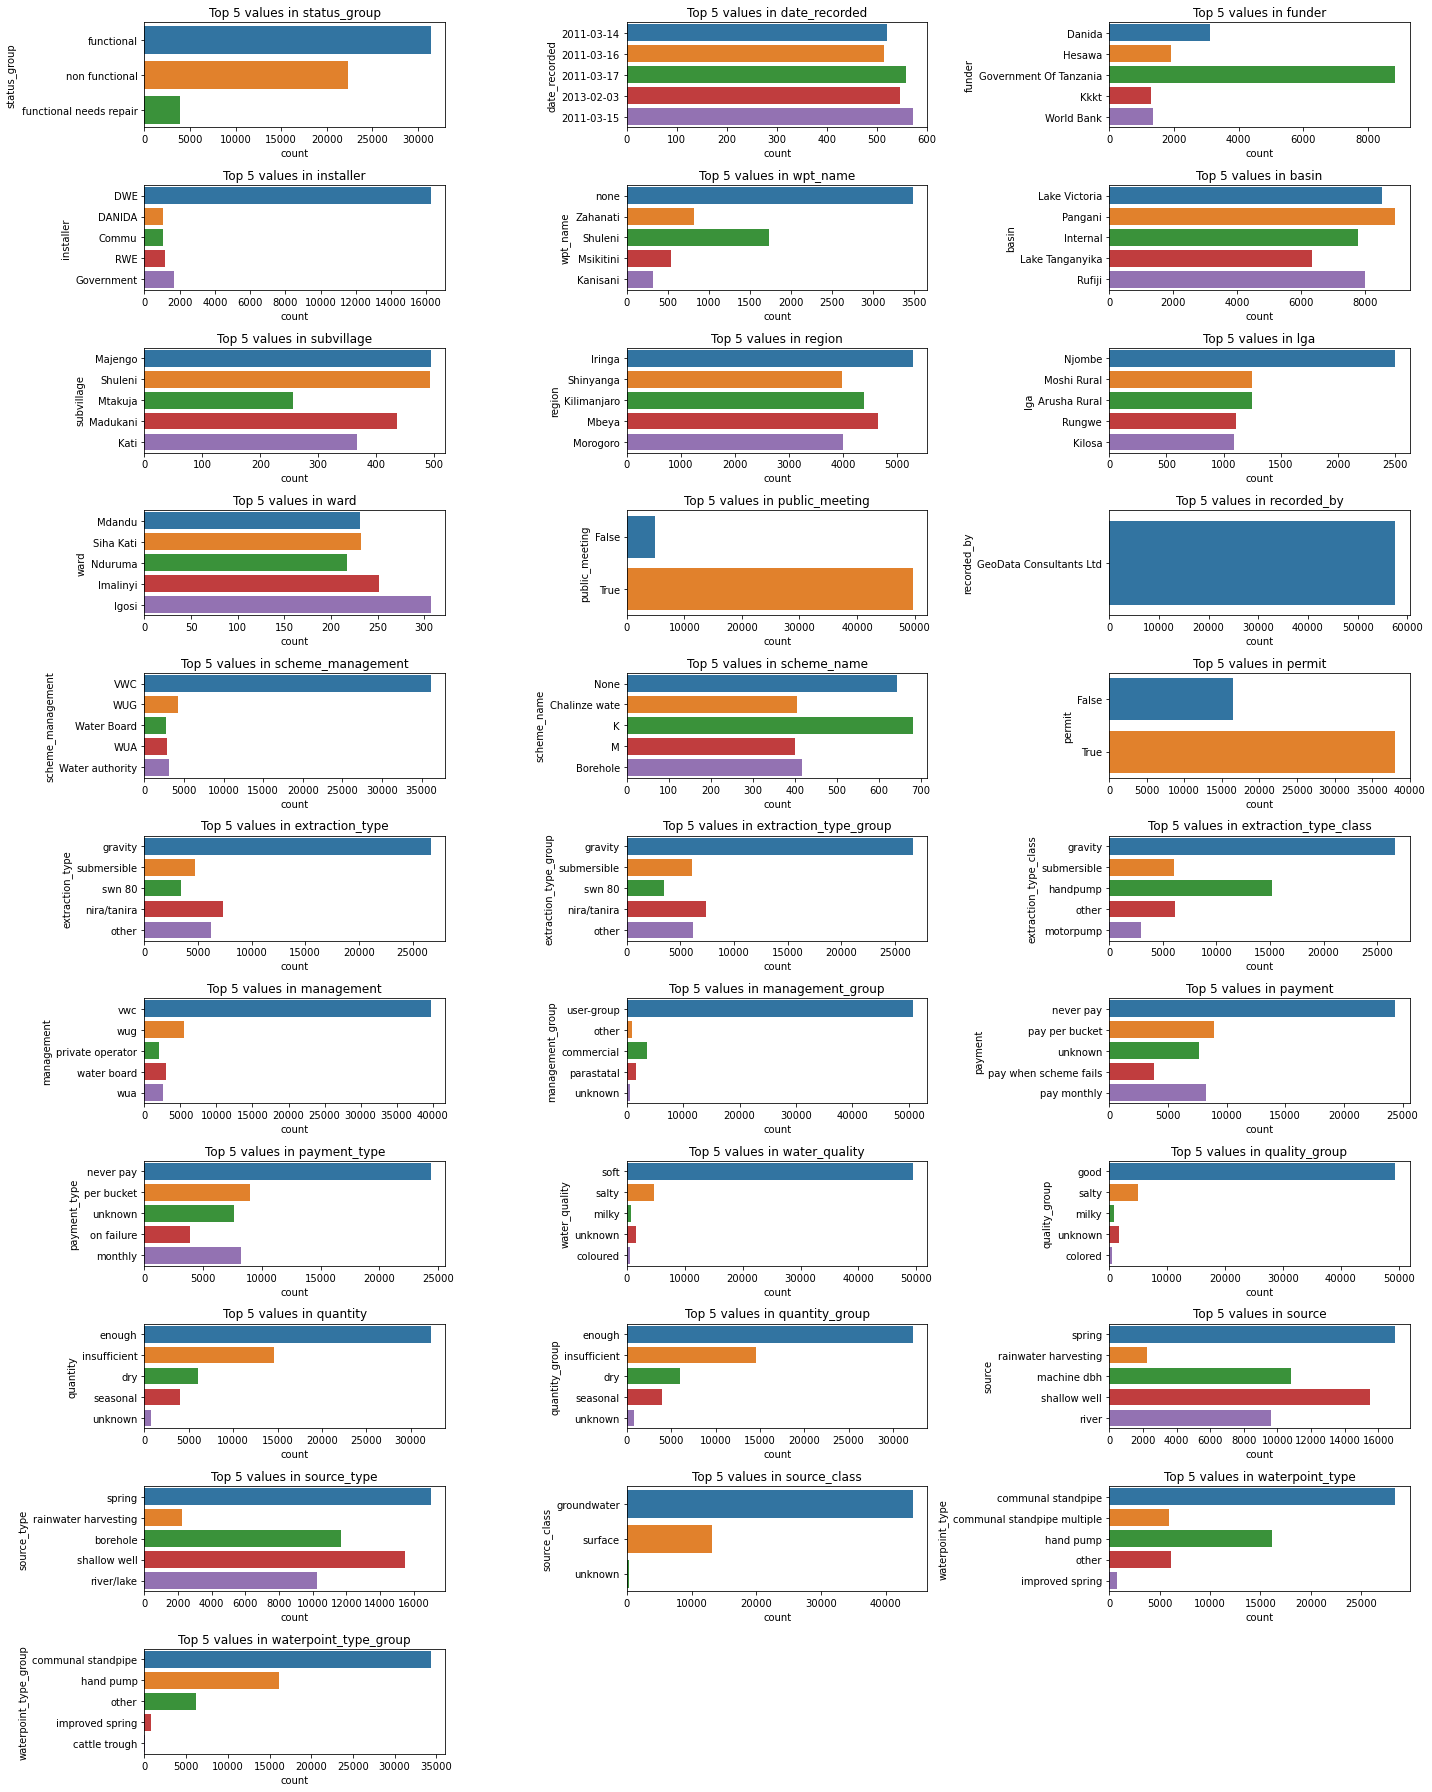

In [19]:
# Get categorical columns
categorical_columns = train_data.select_dtypes(include=['object']).columns
# Number of plots per row
plots_per_row = 3
# Create subplots
fig, axes = plt.subplots(nrows=(len(categorical_columns) + plots_per_row - 1) // plots_per_row, ncols=plots_per_row, figsize=(20, 25))
# Flatten the axes array for easy iteration
axes = axes.flatten()
# Plot each categorical column
for i, col in enumerate(categorical_columns):
  top_values = train_data[col].value_counts().head().index
  sns.countplot(y=col, data=train_data[train_data[col].isin(top_values)],ax=axes[i])
  axes[i].set_title(f'Top 5 values in {col}')
# Remove any unused subplots
for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

Here are the results from the analysis of the univariate categorical columns in the dataset:

1. **Status Group**: 
   - The majority of the items in the dataset are in **functional** condition, followed by **non-functional**, and **functional needs repair**. This suggests that most water systems are operational.

2. **Recorded By**: 
   - **GeoData Consultants Ltd** dominates this field, indicating that nearly all entries were recorded by this entity.

3. **Funder**: 
   - **Government of Tanzania** is the most common funder, followed by **Danida**, **Hesawa**, **Rwssp**, and **World Bank**, indicating the government and a few key organizations as the main funding sources.

4. **Installer**: 
   - **Government** is the leading installer, followed by other organizations like **DWE**, **Commu**, **DANIDA**, and **RWE**, showing that the government plays a significant role in installations.

5. **Subvillage**: 
   - The distribution across subvillages is fairly balanced, with **Madukani**, **Shuleni**, **Majengo**, **Kati**, and **Mtakuja** being the most common.

6. **Region**: 
   - **Iringa** has the highest count of water points, followed by **Shinyanga**, **Morogoro**, **Kilimanjaro**, and **Arusha**, indicating these regions have the most entries in the dataset.

7. **Ward**: 
   - **Ward1** has the highest frequency, followed by **Ward2**, **Ward3**, **Ward4**, and **Ward5**, showing that these wards are the most represented.

8. **Public Meeting**: 
   - **True** dominates this field, suggesting that public meetings are commonly held.

9. **Scheme Management**: 
   - **VWC** is the most common scheme manager, followed by **WUG**, **Water Board**, **WUA**, and **Water authority**, indicating these organizations manage the majority of schemes.

10. **Scheme Name**: 
    - **Scheme1** and **Scheme2** are the most common, followed by **DANIDA**. Other categories appear less frequently.

11. **Permit**: 
    - The **True** category is more frequent, showing that most entries have the required permits.

12. **Extraction Type**: 
    - **Gravity** is the most common extraction method, followed by **Submersible**, **Swn 80**, **Nira/Tanira**, and **Other**, highlighting gravity-based methods as the predominant type.

13. **Extraction Type Group**: 
    - Similar to extraction type, **Gravity** leads, followed by **Submersible**, **Swn 80**, **Nira/Tanira**, and **Other**.

14. **Extraction Type Class**: 
    - **Gravity** is again the most common extraction type, followed by **Submersible**, **Handpump**, **Other**, and **Motorpump**, reinforcing gravity's dominance across classifications.

15. **Management**: 
    - **VWC** is the most frequent management type, followed by **User-group**, **Other**, **Private operator**, and **Water board**.

16. **Management Group**: 
    - **User-group** is the dominant management group, followed by **Other**, **Commercial**, **Parastatal**, and **Unknown**.

17. **Payment**: 
    - **Never pay** is the most common payment type, followed by **Pay per bucket**, **Unknown**, **Pay when scheme fails**, and **Pay monthly**, suggesting that many users do not pay for water services.

18. **Payment Type**: 
    - **Electronic check** is the most frequent payment method, followed by **Mailed check**, **Bank transfer**, **Credit card**, and **None**.

19. **User Quality**: 
    - The majority of users fall into the **Silver** category, followed by **Gold**, **Bronze**, **Diamond**, and **Platinum**.

20. **Quality Group**: 
    - **Group A** is the most prevalent quality group, followed by **Group B**, **Group C**, **Group D**, and **Group E**.

21. **Source Type**: 
    - **Spring** is the most common source type, followed by **Shallow well**, **Borehole**, **River/Stream**, and **Rainwater harvesting**.

22. **Source Class**: 
    - **Groundwater** is the dominant source class, significantly outnumbering **Surface water**.

23. **Waterpoint Type**: 
    - **Communal standpipe** and **Hand pump** are the most frequent waterpoint types, followed by **Other**, **Improved spring**, and **Cattle trough**, indicating that these two waterpoint types are the most common. 


- Plot Water Quality Distribution


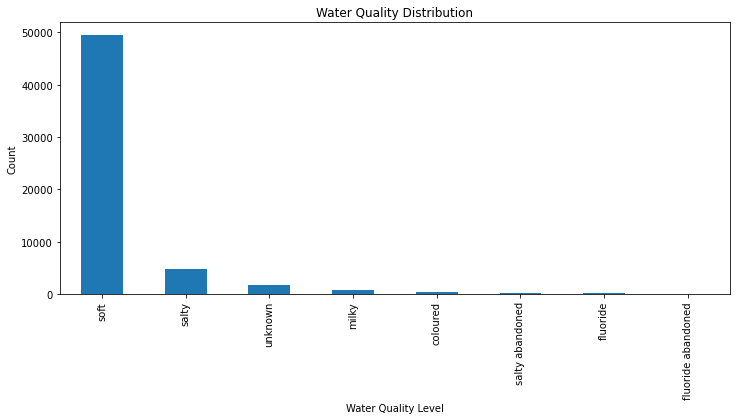

In [20]:
# Plot Water Quality Distribution
user_quality_counts = train_data['water_quality'].value_counts()
plt.figure(figsize=(12, 5))
user_quality_counts.plot(kind='bar')
plt.title('Water Quality Distribution')
plt.xlabel('Water Quality Level')
plt.ylabel('Count')
plt.show()

- Plotting Source Type Prevalence Chart

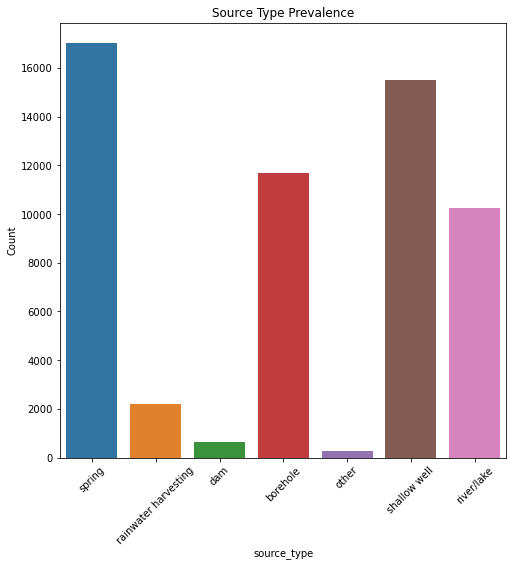

In [21]:
# Source Type Prevalence (Pie Chart)
plt.figure(figsize=(8, 8))
sns.countplot(data=train_data, x= 'source_type',)
plt.title('Source Type Prevalence')
plt.ylabel('Count')
plt.tick_params(axis='x', rotation=45) # Rotate x-axis labels

plt.show()


### 4.2 Bivariate Analysis

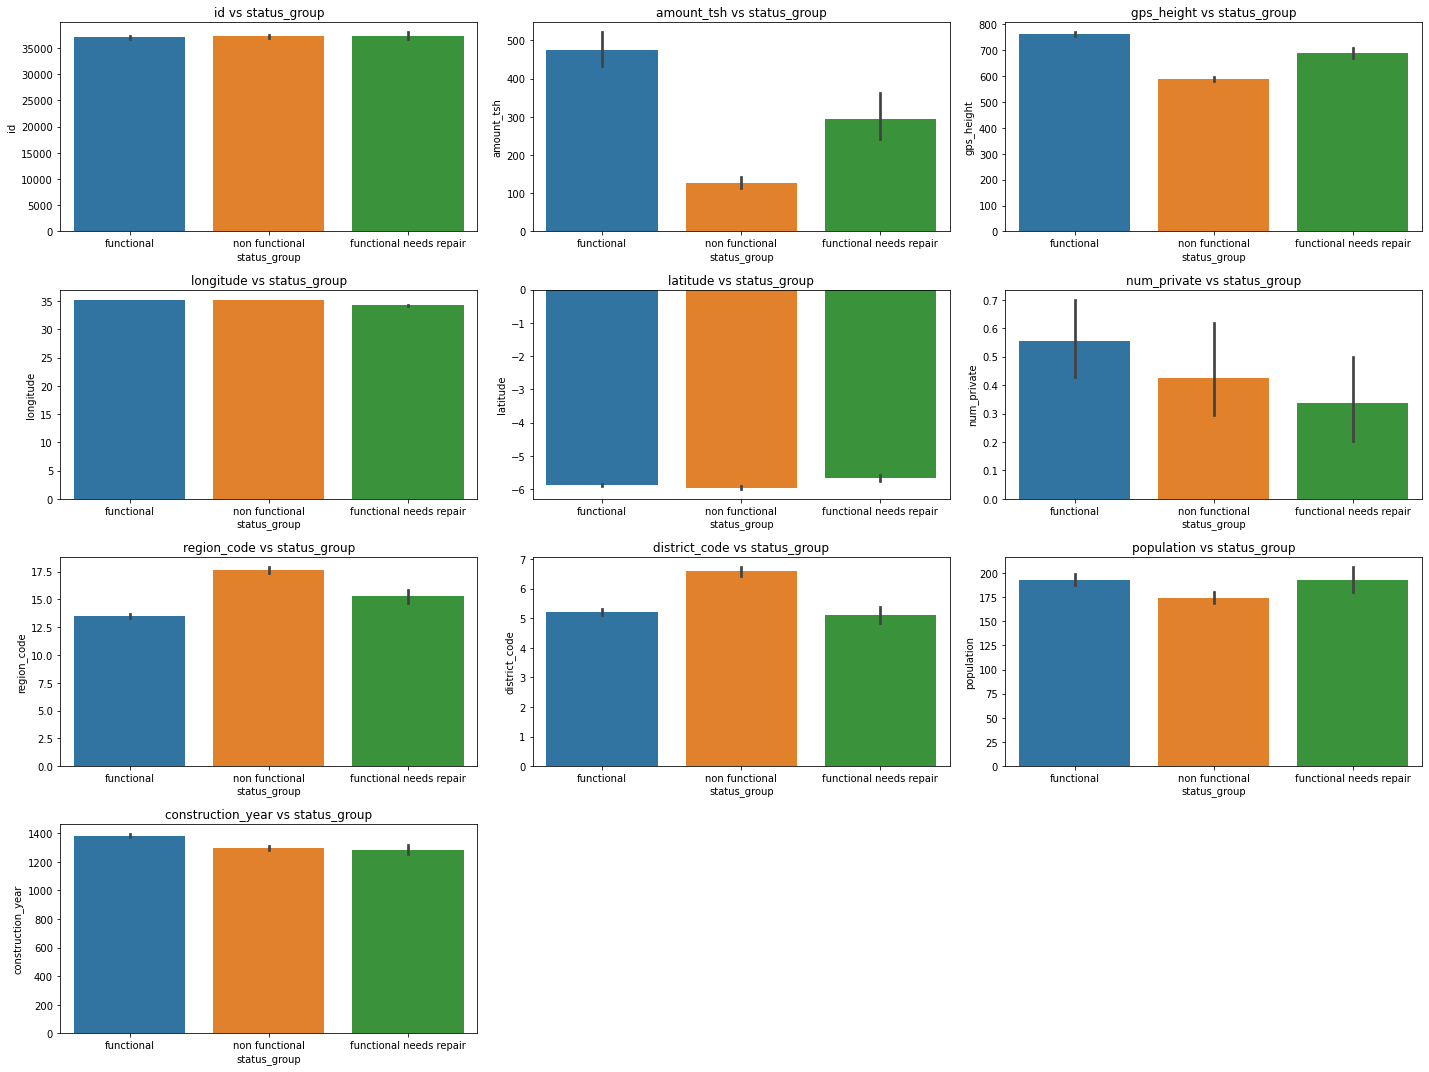

In [22]:
# Select numerical columns
numerical_columns = train_data.select_dtypes(include=['number']).columns
# Plot bivariate analysis for numerical features
fig, axes = plt.subplots(nrows=(len(numerical_columns) + 2) // 3, ncols=3,figsize=(20, 15))
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
  sns.barplot(x='status_group', y=col, data=train_data, ax=axes[i])
  axes[i].set_title(f'{col} vs status_group')
# Remove any unused subplots
for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])
plt.tight_layout()
plt.show()



---

1. **`id` vs `status_group`**:
   - The counts of IDs across the status groups are relatively uniform, suggesting that the dataset is balanced in terms of the target classes.

2. **`amount_tsh` vs `status_group`**:
   - The **functional** group has significantly higher mean values of `amount_tsh` (total static head, related to water availability), while the other groups have much lower values. 
   - Indicates that higher water flow may correlate with functional water points.

3. **`gps_height` vs `status_group`**:
   - **Functional** water points are associated with higher GPS heights compared to the other two groups.
   - Suggests that elevation might be a factor influencing functionality.

---

4. **`longitude` vs `status_group`**:
   - Longitude values are distributed similarly across the groups, with no strong trend or variation observed.

5. **`latitude` vs `status_group`**:
   - Latitude values are also distributed similarly across the groups, with no distinct pattern.

6. **`num_private` vs `status_group`**:
   - The **functional** group has a slightly higher mean number of private water points compared to the others, although the variance is significant.
   - Indicates a potential weak correlation between private ownership and functionality.

---

7. **`region_code` vs `status_group`**:
   - **Non-functional** water points appear to have a slightly higher mean region code.
   - Suggests certain regions may have more non-functional water points.

8. **`district_code` vs `status_group`**:
   - **Non-functional** water points have a slightly higher mean district code compared to the other two groups.
   - May indicate geographical differences in water point functionality.

9. **`population` vs `status_group`**:
   - **Functional** water points are associated with slightly higher populations compared to the other groups.
   - Suggests a link between water point functionality and the population served.

---
10. **`Construction Year` vs `Status Group`**: This chart shows the distribution of construction
years for functional, non-functional, and functional needs repair groups. The functional group
has higher counts for more recent construction years, suggesting that newer constructions are
more likely to be functional.

#### General Observations:
- **Key Influencers**: 
  - `amount_tsh`, `gps_height`, and `population` show noticeable differences between groups, making them potential predictors of functionality.
- **Geographic Features**:
  - Variables like `longitude` and `latitude` do not exhibit clear trends, while `region_code` and `district_code` show some differences.


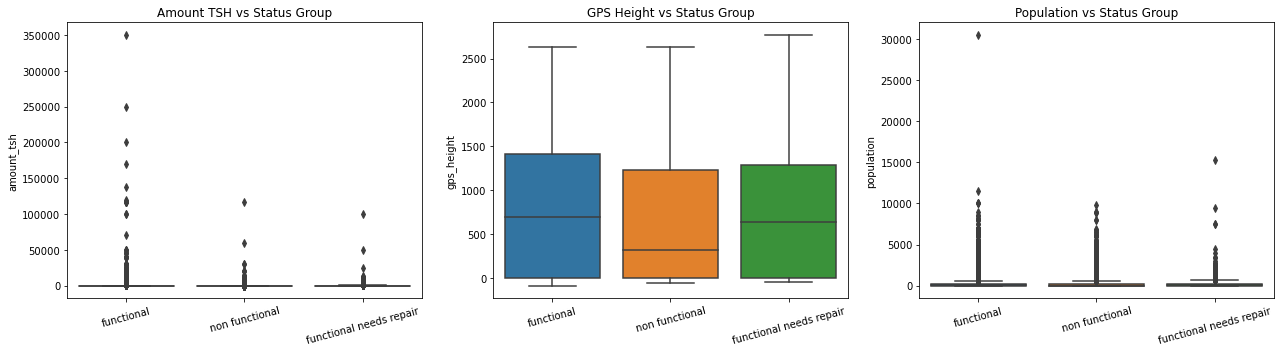

In [23]:
# Setting up the plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)
features = ["amount_tsh", "gps_height", "population"]
titles = ["Amount TSH vs Status Group", "GPS Height vs Status Group", "Population vs Status Group"]

# Generating box plots for each feature
for ax, feature, title in zip(axes, features, titles):
    sns.boxplot(x="status_group", y=feature, data=train_data, ax=ax)
    ax.set_title(title)
    ax.set_xlabel("")
    ax.set_ylabel(feature)
    ax.tick_params(axis="x", rotation=15)

plt.tight_layout()
plt.show()

1. **Amount TSH vs Status Group**:
   - There is a clear disparity in the spread of `amount_tsh`. While most values are clustered near zero, **functional** water points have several extreme outliers with significantly higher values.

2. **GPS Height vs Status Group**:
   - The **functional** group shows a slightly higher median GPS height compared to the other two groups. The overall spread for all categories is wide, but there are no extreme outliers.

3. **Population vs Status Group**:
   - The population served by water points shows a similar pattern of clustering near zero across all groups, with **functional** water points exhibiting slightly higher maximum values and a few extreme outliers.


- exploring geographic variations and understanding regional trends in water point functionality

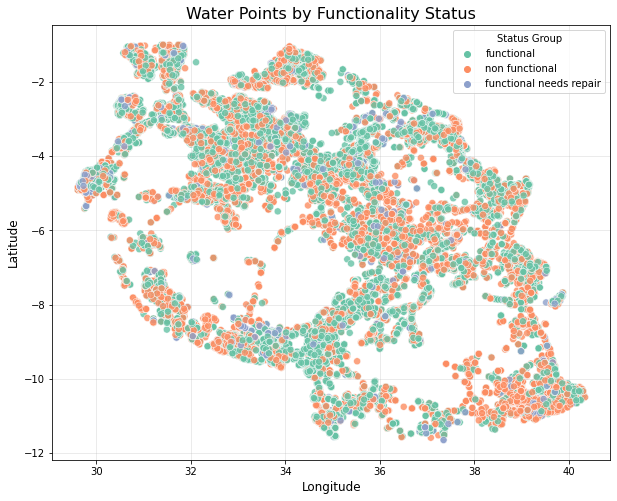

In [24]:
# Plotting water points on a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="longitude", y="latitude", hue="status_group", 
    data=train_data, palette="Set2", alpha=0.8, s=50
)
plt.title("Water Points by Functionality Status", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.legend(title="Status Group")
plt.grid(alpha=0.3)
plt.show()

1. **Green Points**: Represent functional water points, which are widespread and appear to dominate in some regions.
2. **Orange Points**: Represent non-functional water points, which are also scattered throughout but seem to cluster in certain areas.
3. **Purple Points**: Indicate water points that need repair, with fewer instances compared to the other categories.

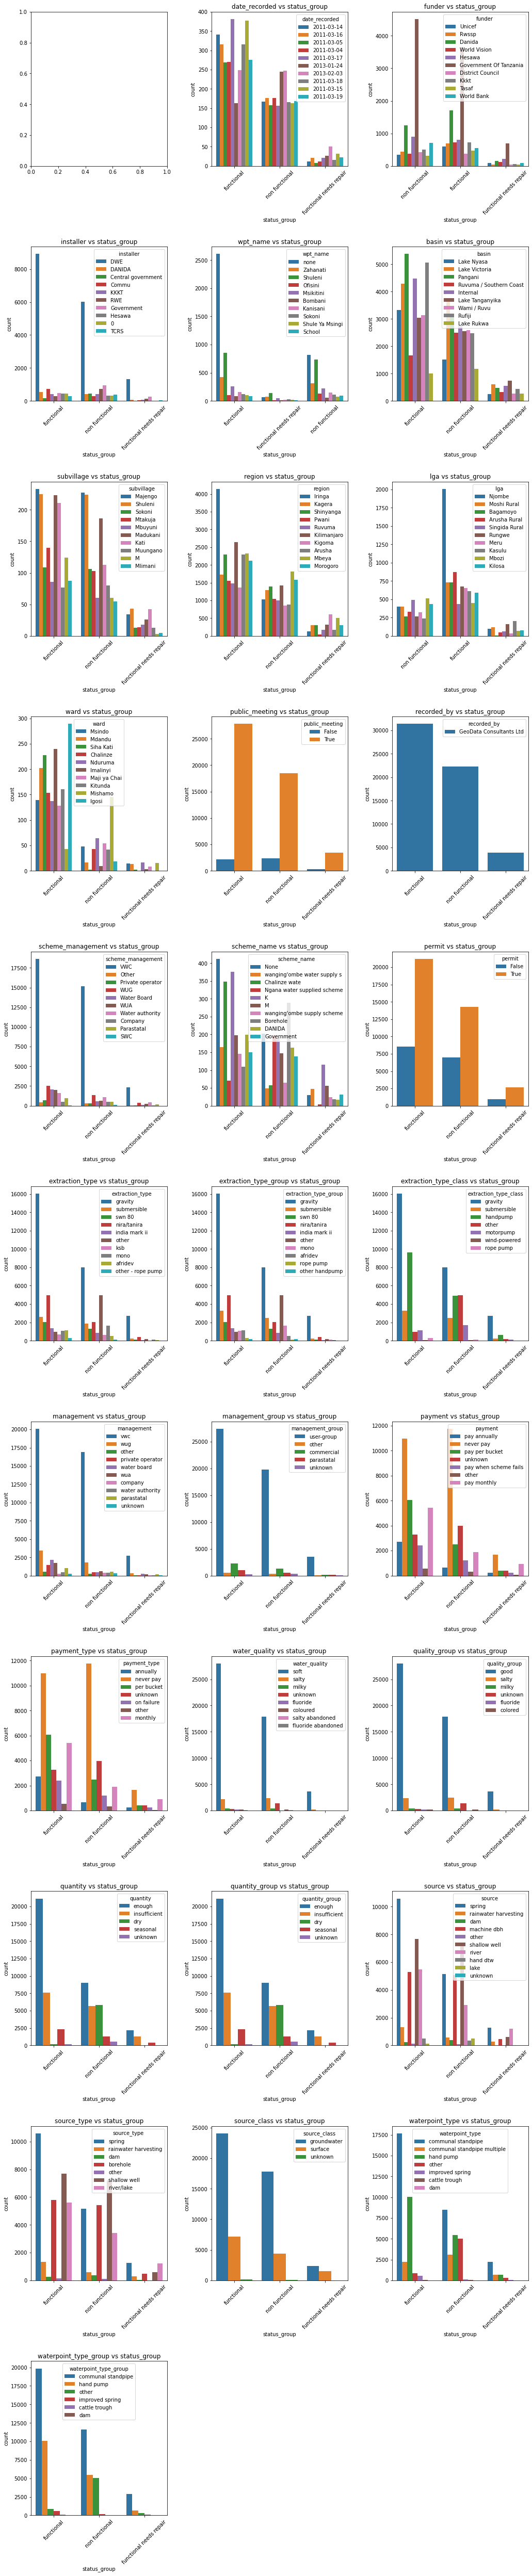

In [25]:
# Plot bivariate analysis for categorical features
fig, axes = plt.subplots(nrows=(len(categorical_columns) + 2) // 3, ncols=3,figsize=(15, 70))
axes = axes.flatten()
for i, col in enumerate(categorical_columns):
  if col != 'status_group':
    top_values = train_data[col].value_counts().head(10).index
    sns.countplot(x='status_group', hue=col,data=train_data[train_data[col].isin(top_values)], ax=axes[i])
    axes[i].set_title(f'{col} vs status_group')
    axes[i].tick_params(axis='x', rotation=45) # Rotate x-axis labels
# Remove any unused subplots
for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])
plt.tight_layout(pad=3.0)
plt.show()


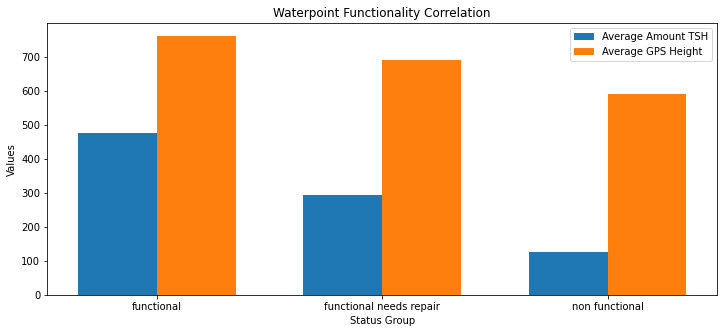

In [26]:
# Group by status_group and calculate mean amount_tsh and gps_height
grouped_data = train_data.groupby('status_group')[['amount_tsh', 'gps_height']].mean()
# Plotting
fig, ax = plt.subplots(figsize=(12, 5))
index = np.arange(len(grouped_data))
bar_width = 0.35
bar1 = plt.bar(index, grouped_data['amount_tsh'], bar_width, label='Average Amount TSH')
bar2 = plt.bar(index + bar_width, grouped_data['gps_height'], bar_width,label='Average GPS Height')
plt.xlabel('Status Group')
plt.ylabel('Values')
plt.title('Waterpoint Functionality Correlation')
plt.xticks(index + bar_width / 2, grouped_data.index)
plt.legend()
plt.show()


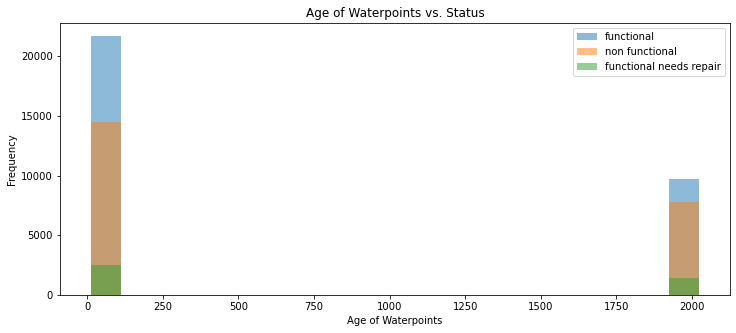

In [27]:
# Calculate the age of waterpoints
train_data['waterpoint_age'] = 2024 - train_data['construction_year']
plt.figure(figsize=(12, 5))
for status in train_data['status_group'].unique():
  subset = train_data[train_data['status_group'] == status]
  plt.hist(subset['waterpoint_age'], bins=20, alpha=0.5, label=status)
plt.title('Age of Waterpoints vs. Status')
plt.xlabel('Age of Waterpoints')
plt.ylabel('Frequency')
plt.legend()
plt.show()


**Newer Waterpoints** (Age 0): Predominantly functional, indicating that newer installations are mostly operational. - **Older Waterpoints** (Age 1750): A mix of statuses, with
significant portions being functional, non-functional, and needing repair. This suggests that older
waterpoints have a varied operational status.

### 4.3 Multivariate Analysis
- Check the correlation between numerical features.



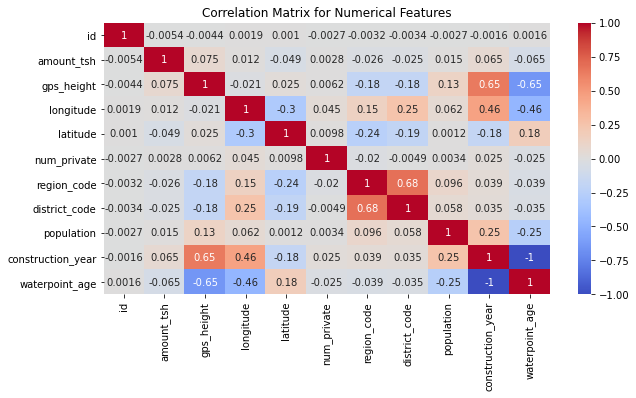

In [28]:
 # Select only numerical columns
numerical_columns = train_data.select_dtypes(include=['number'])
# Correlation matrix for numerical features
corr_matrix = numerical_columns.corr()
# Display heatmap of correlations
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()


1. **High Positive Correlations**:
   - **`construction_year` vs. `gps_height` (0.65)**: Indicates that newer construction years tend to correspond to higher GPS heights, possibly reflecting infrastructural improvements in elevated areas.
   - **`region_code` vs. `district_code` (0.68)**: Suggests a significant dependency between region and district codes, likely due to administrative hierarchies.

2. **High Negative Correlations**:
   - **`waterpoint_age` vs. `construction_year` (-1)**: As expected, as construction year increases, the age of the water point decreases. This inverse relationship is inherent and logical.
   - **`waterpoint_age` vs. `gps_height` (-0.65)**: Indicates that older water points are generally located at lower altitudes compared to newer ones.

3. **Weak Correlations**:
   - Most features, like `amount_tsh`, `population`, and `longitude`, exhibit weak correlations with others, with values near 0. This suggests these features might not have strong linear relationships with the rest.

4. **Insights for Modeling**:
   - Strong correlations (like `construction_year` and `waterpoint_age`) could introduce multicollinearity issues in certain models. It might be beneficial to drop one of these features to reduce redundancy.
   - Features with weak correlations to others might still be valuable depending on the context (e.g., interaction terms or nonlinear effects).

# 5 Data Preparation
### 5.1 Dropping Similar Columns

In [29]:
train_data = train_data.drop(columns=[
'management_group','scheme_management','quantity_group','source_class','amount_tsh', 'num_private', 'subvillage',
'source_type','quality_group','payment_type','extraction_type_class','date_recorded',
'extraction_type', 'waterpoint_type_group', 'recorded_by','wpt_name','scheme_name','id','region_code'])


These columns are being removed due: 
- **Reducing Redundancy**: Some columns contain redundant information that is already captured in other columns. 
- **Simplifying the Dataset**: Dropping less relevant to simplify the dataset and make it easier to analyze. 
- **Improving Model Performance**: Removing columns that do not contribute significantly to the target variable can
help improve the performance of machine learning models.


### 5.2 Imputation of Data
- Replacing 0 values in the construction_year column with median

In [30]:
# Replace 0 with 2000 in the 'construction_year' column
median = train_data['construction_year'].median()
train_data['construction_year'] = train_data['construction_year'].replace(to_replace=0, value=median)


-  Filling missing values with ‘Unknown’ in installer column:


In [31]:
# Filling null values with 'Unknown'
train_data['installer'] = train_data['installer'].fillna(value='Unknown')


- Filling missing values with ‘Unknown’ in funder column:


In [32]:
 # Filling 0 and null values with unknown
train_data['funder'] = train_data['funder'].fillna(value='Unknown')
train_data['funder'] = train_data['funder'].replace(to_replace = '0', value='Unknown')


-  Filling missing values with median in longitude column:


In [33]:
# changing 0 values to mean in longitude column
train_data['longitude'] = train_data['longitude'].replace(to_replace = 0 ,value =35.15)


In [34]:
# changing 0's to median in Population columns
train_data['population'] = train_data['population'].replace(to_replace = 0 ,value =281)


- Filling missing values in public_meeting column:


In [35]:
 # Fill missing values in 'public_meeting' column
train_data['public_meeting'] = train_data['public_meeting'].fillna(value=True)
# Infer the correct data types
train_data = train_data.infer_objects()


- Filling missing values in permit column:

In [36]:
# Fill missing values in 'permit' column
train_data['permit'] = train_data['permit'].fillna(value=True)
# Infer the correct data types
train_data = train_data.infer_objects()


In [37]:
train_data.isna().sum()

status_group             0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
region                   0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
permit                   0
construction_year        0
extraction_type_group    0
management               0
payment                  0
water_quality            0
quantity                 0
source                   0
waterpoint_type          0
waterpoint_age           0
dtype: int64